Importing libraries

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection  import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

Dataset

In [ ]:
data = pd.read_csv("/content/Mall_Customers.csv")

In [ ]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Perform Below Visualizations

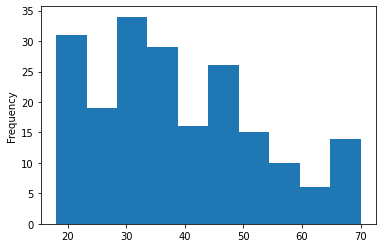

In [ ]:
data['Age'].plot(kind='hist')

{'whiskers': [<matplotlib.lines.Line2D at 0x7f696482edd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f6964837890>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f696482e850>],
 'medians': [<matplotlib.lines.Line2D at 0x7f696483b390>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f696483b8d0>],
 'means': []}

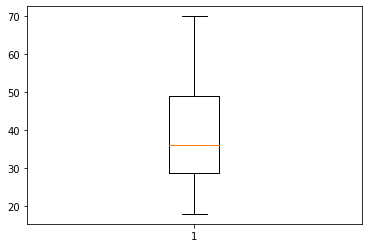

In [ ]:
plt.boxplot(data['Age'])


<BarContainer object of 200 artists>

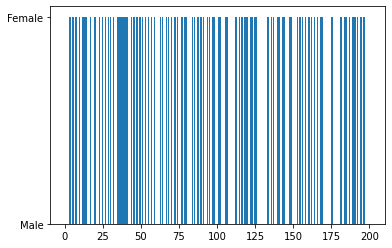

In [ ]:
df = pd.DataFrame(data)
X = list(df.iloc[:,0])
Y = list(df.iloc[:,1])
plt.bar(X,Y)

<BarContainer object of 200 artists>

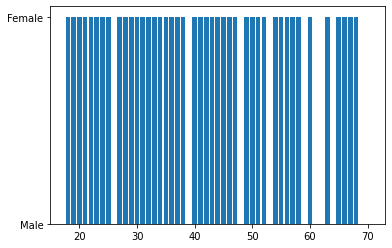

In [ ]:
plt.bar(data['Age'],data['Gender'])


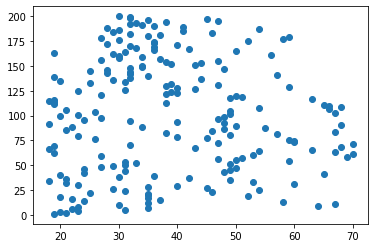

In [ ]:
plt.scatter(data['Age'],data['CustomerID'])

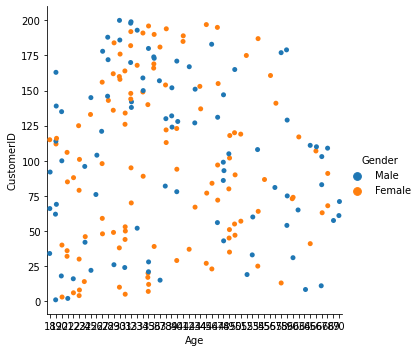

In [ ]:
sns.catplot(data=data,x='Age',y='CustomerID',hue='Gender')

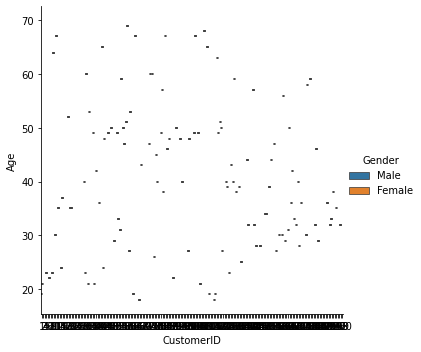

In [ ]:
sns.catplot(data=data,x='CustomerID',y='Age',hue='Gender',kind='box')

Perform descriptive statistics on the dataset.

In [ ]:
data.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


CustomerID                100.50
Age                        38.85
Annual Income (k$)         60.56
Spending Score (1-100)     50.20
dtype: float64

In [ ]:
data.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


CustomerID                100.5
Age                        36.0
Annual Income (k$)         61.5
Spending Score (1-100)     50.0
dtype: float64

In [ ]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
data.shape

(200, 5)

Check for Missing values and deal with them.

In [ ]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Find the outliers and replace them outliers


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


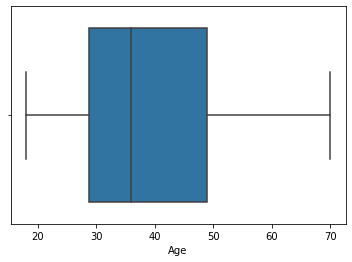

In [ ]:
sns.boxplot(data['Age'])

In [ ]:
qnt = data.quantile(q=[0.25,0.75])
qnt

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0.25,50.75,28.75,41.5,34.75
0.75,150.25,49.00,78.0,73.00


In [ ]:
IQR = qnt.loc[0.75] - qnt.loc[0.25]
IQR

CustomerID                99.50
Age                       20.25
Annual Income (k$)        36.50
Spending Score (1-100)    38.25
dtype: float64

In [ ]:
upper_extreme = qnt.loc[0.75]+1.5*IQR
upper_extreme

CustomerID                299.500
Age                        79.375
Annual Income (k$)        132.750
Spending Score (1-100)    130.375
dtype: float64

In [ ]:
lower_extreme = qnt.loc[0.25]-1.5*IQR
lower_extreme


CustomerID               -98.500
Age                       -1.625
Annual Income (k$)       -13.250
Spending Score (1-100)   -22.625
dtype: float64

In [ ]:
df2 = data[(data['Age']<upper_extreme['Age']) & (data['Age']>lower_extreme['Age'])]
df.shape

(200, 5)

In [ ]:
df2.shape

(200, 5)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


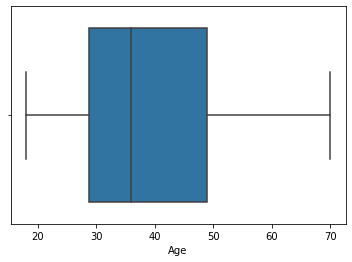

In [ ]:
sns.boxplot(df2['Age'])

Check for Categorical columns and perform encoding.

In [ ]:
le = LabelEncoder()
df2['Gender'] = le.fit_transform(df2['Gender'])
df2['Age'] = le.fit_transform(df2['Age'])
df2.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,1,15,39
1,2,1,3,15,81
2,3,0,2,16,6
3,4,0,5,16,77
4,5,0,13,17,40


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Scaling the data

In [ ]:
scaler = MinMaxScaler()
df[['Age']] = scaler.fit_transform(df[['Age']])
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,0.019231,15,39
1,2,Male,0.057692,15,81
2,3,Female,0.038462,16,6
3,4,Female,0.096154,16,77
4,5,Female,0.250000,17,40
...,...,...,...,...,...
195,196,Female,0.326923,120,79
196,197,Female,0.519231,126,28
197,198,Male,0.269231,126,74
198,199,Male,0.269231,137,18


Perform any of the clustering algorithms

In [ ]:
from sklearn.cluster import KMeans
km = KMeans()
clus = km.fit_predict(df[['Age']])

In [ ]:
clus

array([5, 5, 5, 5, 6, 5, 3, 5, 2, 6, 2, 3, 4, 0, 3, 5, 3, 5, 1, 3, 3, 0,
       1, 6, 4, 6, 1, 3, 7, 5, 4, 5, 4, 5, 1, 5, 7, 6, 3, 5, 2, 0, 1, 6,
       1, 0, 1, 0, 6, 6, 1, 3, 6, 4, 1, 1, 1, 2, 0, 4, 2, 5, 2, 4, 2, 5,
       7, 2, 5, 6, 2, 1, 4, 4, 4, 0, 1, 7, 5, 1, 4, 7, 2, 1, 5, 1, 4, 5,
       3, 1, 2, 5, 1, 7, 6, 0, 1, 0, 1, 5, 5, 1, 2, 0, 1, 5, 2, 4, 2, 2,
       2, 5, 7, 5, 5, 5, 2, 1, 1, 1, 0, 7, 7, 7, 5, 6, 7, 7, 4, 7, 1, 7,
       0, 6, 5, 6, 7, 6, 5, 3, 4, 6, 0, 6, 0, 0, 1, 6, 3, 3, 7, 7, 7, 7,
       1, 0, 3, 6, 3, 6, 4, 6, 5, 6, 1, 3, 7, 3, 3, 6, 7, 0, 3, 3, 1, 6,
       4, 0, 4, 3, 3, 6, 1, 6, 7, 6, 4, 0, 7, 3, 3, 6, 3, 7, 1, 3, 1, 6,
       6, 6], dtype=int32)

In [ ]:
names = data.columns

In [ ]:
names

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [ ]:
data1 = pd.DataFrame(df[['Age']], columns=names)

In [ ]:
data1

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,NaN,NaN,0.019231,NaN,NaN
1,NaN,NaN,0.057692,NaN,NaN
2,NaN,NaN,0.038462,NaN,NaN
3,NaN,NaN,0.096154,NaN,NaN
4,NaN,NaN,0.250000,NaN,NaN
...,...,...,...,...,...
195,NaN,NaN,0.326923,NaN,NaN
196,NaN,NaN,0.519231,NaN,NaN
197,NaN,NaN,0.269231,NaN,NaN
198,NaN,NaN,0.269231,NaN,NaN


Add the cluster data with the primary dataset

In [ ]:
data1['kclus'] = pd.Series(clus)

In [ ]:
data1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),kclus
0,NaN,NaN,0.019231,NaN,NaN,5
1,NaN,NaN,0.057692,NaN,NaN,5
2,NaN,NaN,0.038462,NaN,NaN,5
3,NaN,NaN,0.096154,NaN,NaN,5
4,NaN,NaN,0.250000,NaN,NaN,6


In [ ]:
data1['kclus'].unique()

array([5, 6, 3, 2, 4, 0, 1, 7], dtype=int32)

Split the data into dependent and independent variables.

In [ ]:
x = data.drop('Gender', axis = 1)
y = data['Age']

In [ ]:
x

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,1,0.019231,15,39
1,2,0.057692,15,81
2,3,0.038462,16,6
3,4,0.096154,16,77
4,5,0.250000,17,40
...,...,...,...,...
195,196,0.326923,120,79
196,197,0.519231,126,28
197,198,0.269231,126,74
198,199,0.269231,137,18


In [ ]:
y

0      19
1      21
2      20
3      23
4      31
       ..
195    35
196    45
197    32
198    32
199    30
Name: Age, Length: 200, dtype: int64

Split the data into training and testing

In [ ]:
train_size=0.05
X = df.drop(columns=['Gender']).copy()
Y = df['Age']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.1)
print(X_train)
print(Y_train)
print(X_test)
print(Y_test)

     CustomerID       Age  Annual Income (k$)  Spending Score (1-100)
54           55  0.615385                  43                      45
89           90  0.615385                  58                      46
196         197  0.519231                 126                      28
163         164  0.250000                  81                      93
128         129  0.788462                  71                      11
29           30  0.096154                  29                      87
28           29  0.423077                  29                      31
8             9  0.884615                  19                       3
143         144  0.269231                  76                      87
161         162  0.211538                  79                      83
185         186  0.230769                  99                      97
11           12  0.326923                  19                      99
13           14  0.115385                  20                      77
175         176  0.2

Build the Model

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [ ]:
lr.fit(X_train,Y_train)

LinearRegression()

In [ ]:
pred = lr.predict(X_train)

In [ ]:
pred

array([0.61538462, 0.61538462, 0.51923077, 0.25      , 0.78846154,
       0.09615385, 0.42307692, 0.88461538, 0.26923077, 0.21153846,
       0.23076923, 0.32692308, 0.11538462, 0.23076923, 0.59615385,
       0.32692308, 0.38461538, 0.34615385, 0.80769231, 0.32692308])